In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Korean font setup (optional)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style('whitegrid')

print('✅ Libraries loaded')

✅ Libraries loaded


## 1. Load Data

In [2]:
# Data file path
data_path = '/home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/kaggle_flights/flight_data_2024_sample.csv'

# Load data
print('📂 Loading data...')
df = pd.read_csv(data_path)
print(f'✅ Load complete: {len(df):,} rows')

# Basic info
print(f'\nData shape: {df.shape}')
print(f'Period: {df["fl_date"].min()} ~ {df["fl_date"].max()}')

# Map airline code -> name
AIRLINE_NAMES = {
 'AA': 'American Airlines',
 'DL': 'Delta Air Lines',
 'UA': 'United Airlines',
 'WN': 'Southwest Airlines',
 'B6': 'JetBlue Airways',
 'AS': 'Alaska Airlines',
 'NK': 'Spirit Airlines',
 'F9': 'Frontier Airlines',
 'G4': 'Allegiant Air',
 'SY': 'Sun Country Airlines',
 'HA': 'Hawaiian Airlines',
 'QX': 'Horizon Air',
 'OO': 'SkyWest Airlines',
 '9E': 'Endeavor Air',
 'YX': 'Republic Airways',
 'YV': 'Mesa Airlines',
 'MQ': 'Envoy Air',
 'OH': 'PSA Airlines',
 'PT': 'Piedmont Airlines',
 'G7': 'GoJet Airlines'
}

# Add airline name column
df['airline_name'] = df['op_unique_carrier'].map(AIRLINE_NAMES)
df['airline_name'] = df['airline_name'].fillna(df['op_unique_carrier']) # use code if mapping is missing

print(f'\n✈️ Airline name mapping complete')
print(f'Number of mapped airlines: {df["airline_name"].nunique()}')

📂 Loading data...
✅ Load complete: 10,000 rows

Data shape: (10000, 35)
Period: 2024-01-01 ~ 2024-12-31

✈️ Airline name mapping complete
Number of mapped airlines: 15


## 2. Inspect Data Structure

In [4]:
# Column list
print('📋 Full column list:')
print(df.columns.tolist())
print(f'\ntotal {len(df.columns)} columns')

📋 Full column list:
['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name', 'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

total 35 columns


In [3]:
# Show key columns only
key_columns = ['fl_date', 'op_unique_carrier', 'airline_name', 'op_carrier_fl_num', 'origin', 'dest', 
 'crs_dep_time', 'dep_time', 'dep_delay', 'arr_delay', 'cancelled']

print('🔍 Sample data (key columns):')
df[key_columns].head(10)

🔍 Sample data (key columns):


,fl_date,op_unique_carrier,airline_name,op_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,arr_delay,cancelled
0,2024-04-18,MQ,Envoy Air,3535.0,DFW,RAP,1018,1015.0,-3.0,-10.0,0
1,2024-01-01,AA,American Airlines,148.0,CLT,PHX,1637,1633.0,-4.0,-17.0,0
2,2024-12-12,9E,Endeavor Air,5440.0,CHA,ATL,1000,952.0,-8.0,-17.0,0
3,2024-04-08,WN,Southwest Airlines,1971.0,OMA,LAS,1330,1334.0,4.0,1.0,0
4,2024-02-16,WN,Southwest Airlines,862.0,BWI,MYR,1340,1333.0,-7.0,-1.0,0
5,2024-04-15,WN,Southwest Airlines,2358.0,SAN,PHX,715,708.0,-7.0,-14.0,0
6,2024-11-27,G4,Allegiant Air,163.0,MLB,ABE,933,924.0,-9.0,-4.0,0
7,2024-08-31,AS,Alaska Airlines,1269.0,BNA,PDX,1855,1850.0,-5.0,-27.0,0
8,2024-04-19,OO,SkyWest Airlines,3438.0,LAX,SJC,820,814.0,-6.0,-2.0,0
9,2024-02-08,OO,SkyWest Airlines,5654.0,SFO,BFL,2235,2227.0,-8.0,-23.0,0


In [4]:
# Data types
print('📊 Data types:')
df[key_columns].dtypes

📊 Data types:


fl_date str
op_unique_carrier str
airline_name str
op_carrier_fl_num float64
origin str
dest str
crs_dep_time int64
dep_time float64
dep_delay float64
arr_delay float64
cancelled int64
dtype: object

In [5]:
# Check missing values
print('❓ Missing value status:')
missing = df[key_columns].isnull().sum()
missing[missing > 0].sort_values(ascending=False)

❓ Missing value status:


arr_delay 164
dep_time 116
dep_delay 116
dtype: int64

## 3. Check Distribution by Origin

In [ ]:
# Number of flights by origin
print('🛫 Flight distribution by origin (Top 20):')
origin_counts = df['origin'].value_counts().head(20)
print(origin_counts)
print(f'\nTotal number of origins: {df["origin"].nunique()}')

# Use JFK for testing only
jfk_count = len(df[df['origin'] == 'JFK'])
print(f'\n⚠️ JFK departures: {jfk_count:,} ({jfk_count/len(df)*100:.2f}%) - for testing only')

🛫 Filtering JFK departure flights...
✅ JFK departures: 194 (1.9%)

📍 Top 10 destinations:


dest
LAX 21
RDU 13
SFO 10
MIA 8
PHX 8
SJU 7
DCA 6
TPA 6
BOS 6
SAN 6
Name: count, dtype: int64

## 4. Filter Domestic Flights Only (All Airports)

In [7]:
# Major US domestic airport codes
DOMESTIC_AIRPORTS = {
 'ATL', 'LAX', 'ORD', 'DFW', 'DEN', 'SFO', 'SEA', 'LAS', 'MCO', 'EWR',
 'CLT', 'PHX', 'IAH', 'MIA', 'BOS', 'MSP', 'FLL', 'DTW', 'PHL', 'LGA',
 'BWI', 'SLC', 'SAN', 'DCA', 'MDW', 'TPA', 'PDX', 'STL', 'HNL', 'AUS',
 'BNA', 'OAK', 'RDU', 'SMF', 'SJC', 'SNA', 'PIT', 'CVG', 'CMH', 'IND',
 'MKE', 'OMA', 'BUF', 'PVD', 'BDL', 'ALB', 'ROC', 'SYR', 'RIC', 'CLE',
 'JFK', 'ABQ', 'ANC', 'BHM', 'BOI', 'BUR', 'CHS', 'COS', 'DAL', 'DSM',
 'ELP', 'FAT', 'GEG', 'GRR', 'GSO', 'GSP', 'JAX', 'LBB', 'LEX', 'LIT',
 'MCI', 'MEM', 'MSY', 'OKC', 'ONT', 'PBI', 'PHF', 'PWM', 'RNO', 'RSW',
 'SJU', 'SAT', 'SAV', 'SDF', 'TUL', 'TUS', 'XNA'
}

# Filter domestic flights only (both origin and destination are domestic)
print('🇺🇸 Filtering domestic flights...')
domestic_flights = df[
 df['origin'].isin(DOMESTIC_AIRPORTS) & 
 df['dest'].isin(DOMESTIC_AIRPORTS)
].copy()
print(f'✅ Domestic flights: {len(domestic_flights):,} ({len(domestic_flights)/len(df)*100:.1f}%)')

# Top origins
print('\n📍 Top domestic origins (Top 10):')
print(domestic_flights['origin'].value_counts().head(10))

🇺🇸 Filtering domestic flights...
✅ Domestic flights: 7,525 (75.2%)

📍 Top domestic origins (Top 10):
origin
ATL 362
ORD 303
DEN 303
DFW 295
LAX 260
PHX 252
CLT 224
LGA 214
LAS 214
MCO 199
Name: count, dtype: int64


## 5. Data Preprocessing

In [8]:
# Remove canceled flights
print('🚫 Removing canceled flights...')
cancelled_count = domestic_flights['cancelled'].sum()
print(f' Canceled flights: {cancelled_count}')

domestic_active = domestic_flights[domestic_flights['cancelled'] == 0].copy()
print(f'✅ Operated flights: {len(domestic_active):,}')

🚫 Removing canceled flights...
 Canceled flights: 91
✅ Operated flights: 7,434


In [9]:
# Convert time data
def convert_time(time_val):
 """Convert HHMM format to HH:MM"""
 if pd.isna(time_val):
 return None
 time_str = str(int(time_val)).zfill(4)
 return f"{time_str[:2]}:{time_str[2:]}"

# Convert scheduled/actual departure times
domestic_active['scheduled_time'] = domestic_active['crs_dep_time'].apply(convert_time)
domestic_active['actual_time'] = domestic_active['dep_time'].apply(convert_time)

print('⏰ Time-format conversion complete')
print('\nsample:')
domestic_active[['fl_date', 'scheduled_time', 'actual_time', 'dep_delay']].head()

⏰ Time format conversion complete

sample:


,fl_date,scheduled_time,actual_time,dep_delay
1,2024-01-01,16:37,16:33,-4.0
3,2024-04-08,13:30,13:34,4.0
5,2024-04-15,07:15,07:08,-7.0
7,2024-08-31,18:55,18:50,-5.0
8,2024-04-19,08:20,08:14,-6.0


In [ ]:
# Generate flight number (convert to integer)
domestic_active['flight_number'] = (
 domestic_active['op_unique_carrier'] + 
 domestic_active['op_carrier_fl_num'].astype(int).astype(str)
)

print('✈️ Flight number generation complete')
print('\nsample:')
domestic_active[['flight_number', 'airline_name', 'origin', 'dest', 'scheduled_time']].head()

✈️ Flight number generation complete

sample:


,flight_number,dest,scheduled_time
70,AA1.0,LAX,07:00
81,9E5097.0,RDU,07:50
108,AA397.0,CLT,14:35
118,AA2131.0,MIA,07:06
178,9E5227.0,RDU,13:00


## 6. Delay Statistics Analysis

In [10]:
# Delay statistics
print('📊 Departure delay statistics:')
print(domestic_active['dep_delay'].describe())

print('\n⏰ Delay categories:')
delay_categories = pd.cut(
 domestic_active['dep_delay'],
 bins=[-float('inf'), 0, 15, 30, 60, float('inf')],
 labels=['On-time/Early', '<=15 min', '15-30 min', '30-60 min', '>=60 min']
)
print(delay_categories.value_counts().sort_index())

📊 departure delay statistics:
count 7434.000000
mean 13.449960
std 53.226147
min -19.000000
25% -5.000000
50% -2.000000
75% 10.000000
max 2011.000000
Name: dep_delay, dtype: float64

⏰ Delay categories:
dep_delay
On-time/Early 4568
15 min or less 1300
15-30 min 511
30-60 min 457
60 min or more 598
Name: count, dtype: int64


/tmp/ipykernel_378884/1461275665.py:19: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
 plt.tight_layout()
/tmp/ipykernel_378884/1461275665.py:19: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
 plt.tight_layout()
/tmp/ipykernel_378884/1461275665.py:19: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
 plt.tight_layout()
/tmp/ipykernel_378884/1461275665.py:19: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
 plt.tight_layout()
/tmp/ipykernel_378884/1461275665.py:19: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
 plt.tight_layout()
/tmp/ipykernel_378884/1461275665.py:19: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
 plt.tight_layout()
/tmp/ipykernel_378884/1461275665.py:19: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
 plt.tigh

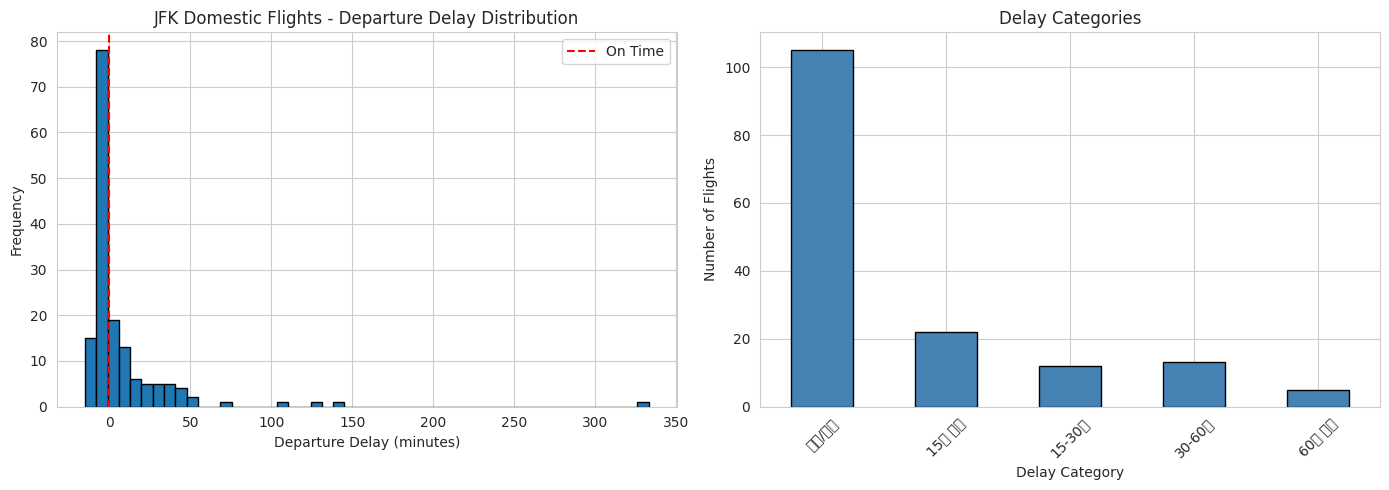


Average delay: 7.6 min
Median delay: -3.0 min


In [ ]:
# Visualize delay distribution
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
domestic_active['dep_delay'].hist(bins=50, edgecolor='black')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.title('US Domestic Flights - Departure Delay Distribution')
plt.axvline(0, color='red', linestyle='--', label='On Time')
plt.legend()

plt.subplot(1, 2, 2)
delay_categories.value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Delay Category')
plt.ylabel('Number of Flights')
plt.title('Delay Categories')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f'\nAverage delay: {domestic_active["dep_delay"].mean():.1f} min')
print(f'Median delay: {domestic_active["dep_delay"].median():.1f} min')

## 7. Time-Slot Analysis

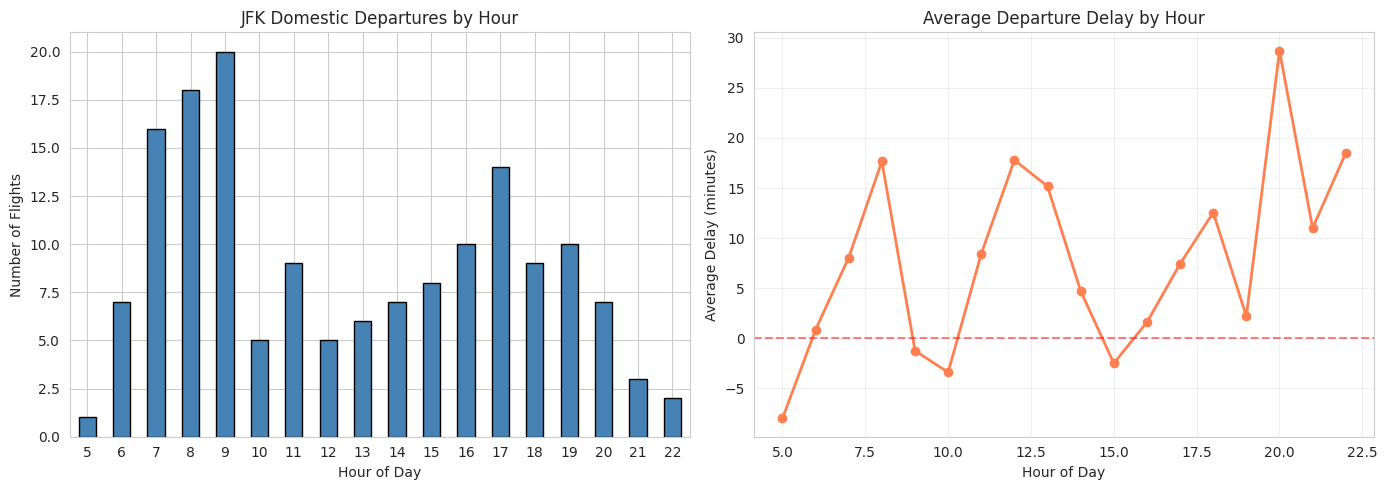


⏰ Average delay by time slot:
hour
5 -8.0
6 0.9
7 8.1
8 17.7
9 -1.2
10 -3.4
11 8.4
12 17.8
13 15.2
14 4.7
15 -2.5
16 1.6
17 7.4
18 12.6
19 2.2
20 28.7
21 11.0
22 18.5
Name: dep_delay, dtype: float64


In [ ]:
# Extract time slot
domestic_active['hour'] = domestic_active['crs_dep_time'].apply(
 lambda x: int(str(int(x)).zfill(4)[:2]) if pd.notna(x) else None
)

# Number of flights by time slot
flights_by_hour = domestic_active['hour'].value_counts().sort_index()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
flights_by_hour.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Flights')
plt.title('US Domestic Departures by Hour')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
delay_by_hour = domestic_active.groupby('hour')['dep_delay'].mean()
delay_by_hour.plot(kind='line', marker='o', color='coral', linewidth=2)
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Departure Delay by Hour')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print('\n⏰ Average delay by time slot:')
print(delay_by_hour.round(1))

## 8. Airline Analysis

In [ ]:
# Airline statistics
carrier_stats = domestic_active.groupby('airline_name').agg({
 'flight_number': 'count',
 'dep_delay': 'mean'
}).round(1)
carrier_stats.columns = ['Total Flights', 'Avg Delay (min)']
carrier_stats = carrier_stats.sort_values('Total Flights', ascending=False)

print('✈️ Airline statistics:')
print(carrier_stats)

# Top 5 airlines with severe delays
print('\n⚠️ Airlines with the highest average delay (100+ flights):')
delay_carriers = carrier_stats[carrier_stats['Total Flights'] >= 100].sort_values('Avg Delay (min)', ascending=False)
print(delay_carriers.head())

✈️ Airline statistics (Top 10):


,total flights,Avg Delay (min)
op_unique_carrier,,
DL,47,14.6
B6,35,6.6
AA,28,2.1
YX,25,-2.7
9E,19,8.1
AS,2,68.5
OO,1,-5.0


## 9. Final Data Preparation

In [ ]:
# Create evaluation data for the departure-time prediction system
final_columns = [
 'fl_date', 'flight_number', 'op_unique_carrier', 'airline_name', 'origin', 'dest',
 'scheduled_time', 'actual_time', 'dep_delay',
 'crs_dep_time', 'dep_time'
]

eval_data = domestic_active[final_columns].copy()

# Remove missing values
eval_data = eval_data.dropna(subset=['scheduled_time', 'actual_time', 'dep_delay'])

print(f'📊 Final evaluation data: {len(eval_data):,} flights')
print('\nsample:')
eval_data.head(10)

📊 Final evaluation data: 157 flights

sample:


,fl_date,flight_number,op_unique_carrier,dest,scheduled_time,actual_time,dep_delay,crs_dep_time,dep_time
70,2024-02-05,AA1.0,AA,LAX,07:00,07:37,37.0,700,737.0
81,2024-09-16,9E5097.0,9E,RDU,07:50,08:34,44.0,750,834.0
108,2024-08-26,AA397.0,AA,CLT,14:35,14:53,18.0,1435,1453.0
118,2024-09-20,AA2131.0,AA,MIA,07:06,06:59,-7.0,706,659.0
178,2024-01-12,9E5227.0,9E,RDU,13:00,12:55,-5.0,1300,1255.0
192,2024-11-08,YX4546.0,YX,DCA,20:59,20:52,-7.0,2059,2052.0
323,2024-08-01,AA2772.0,AA,AUS,20:00,20:07,7.0,2000,2007.0
369,2024-03-14,YX4398.0,YX,CLE,09:13,09:06,-7.0,913,906.0
378,2024-10-27,B62723.0,B6,LAX,19:20,19:42,22.0,1920,1942.0
390,2024-03-02,AA1487.0,AA,PHX,08:30,08:27,-3.0,830,827.0


In [ ]:
# Random sampling (50)
eval_sample = eval_data.sample(n=min(50, len(eval_data)), random_state=42)

print(f'🎯 Evaluation sample: {len(eval_sample)}')
print('\nDestination distribution:')
print(eval_sample['dest'].value_counts())

## 10. Save Data

In [ ]:
# Save full cleaned dataset
output_full = '/home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/all_domestic_cleaned.csv'
eval_data.to_csv(output_full, index=False)
print(f'💾 Full data saved: {output_full}')
print(f' Size: {len(eval_data):,} flights')

# Save separate JFK test dataset
jfk_test_data = eval_data[eval_data['origin'] == 'JFK'].copy()
output_jfk = '/home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/jfk_test_data.csv'
jfk_test_data.to_csv(output_jfk, index=False)
print(f'\n💾 JFK test data saved: {output_jfk}')
print(f' Size: {len(jfk_test_data):,} flights')

# Evaluation sample (randomly sampled from full dataset)
eval_sample = eval_data.sample(n=min(100, len(eval_data)), random_state=42)
output_sample = '/home/jyko/iitp/aircraft/AI-Enabled-IFTA/departure_prediction/data/domestic_eval_100.csv'
eval_sample.to_csv(output_sample, index=False)
print(f'\n💾 evaluation sample save: {output_sample}')
print(f' Size: {len(eval_sample)} flights')

## ✅ Preprocessing Complete!

### Generated Files:
1. `all_domestic_cleaned.csv` - Full domestic-flight data (training/evaluation)
2. `jfk_test_data.csv` - JFK departures only (for testing)
3. `domestic_eval_100.csv` - 100 random samples (quick evaluation)

### Next Steps:
1. Evaluate the departure-time prediction system with saved data
2. Compare actual delays with system recommendations
3. Analyze accuracy by airline
4. Compute accuracy metrics